Lecture 16 - Binary Classification 2

Announcements
1. Problem set 8 and quiz 8 due this weekend!

Binary classification

1. Decision Trees
2. Logistic Regression
3. Other classification algorithms


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

We will load a different dataset. Here is the description: 

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa.
There are roughly two controls per case of coronary heart disease. Many of the coronary heart disease
positive men have undergone blood pressure reduction treatment and other programs to reduce their risk
factors after their coronary heart disease event. In some cases the measurements were made after these
treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African
Medical Journal.

http://www2.stat.duke.edu/~cr173/Sta102_Sp14/Project/heart.pdf

In [2]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data',index_col=0)

In [3]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Just like in the last class, let's focus on binary classification with just a single feature

More complicated combinations of the features and/or changes to the algorithms will provide better fits to the data, but it is easier to understand the models by first using just a single feature

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

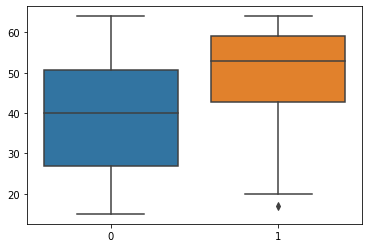

In [4]:
X = np.array(data[data.columns[8]]) # age
y = np.array(data[data.columns[-1]]) # heart disease

sns.boxplot(y,X)

In [5]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X.reshape(len(X),1),y,random_state=1)

Then, let's do our decision tree classification!

For the moment, let's set the max depth of the tree to be 1

This parameter determines how many layers we go. At a max depth of 1, we will just be splitting the data once. If the max depth was 2, we could at most, split the data twice, etc etc

Note that how we fit the model is very similar to what we did for linear regression!

In [6]:
tree_model = tree.DecisionTreeClassifier(max_depth=1) 
tree_model = tree_model.fit(Xtrain, ytrain)

Done!

Now, let's check the model score, which is the mean accuracy

In [7]:
tree_model.score(Xtrain, ytrain)

0.7023121387283237

In [8]:
tree_model.score(Xtest, ytest)

0.6810344827586207



We can get our confusion matrix by comparing the ytest to the predicted values from the model

This is very similar to how we did linear regression!

In [9]:
tree_model.predict(Xtest)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1])

We can check out the confusion matrix with metrics

In [10]:
metrics.confusion_matrix(ytest,tree_model.predict(Xtest)) 

array([[56, 20],
       [17, 23]])

This is also a handy way to save the confusion matrix values

Which you could then use to compute the F1 score or Matthews Correlation Coefficient

In [11]:
tn, fp, fn, tp = metrics.confusion_matrix(ytest,tree_model.predict(Xtest)).ravel()
print(tn, fp, fn, tp)

56 20 17 23


We can visualize the decision tree model and see the brances, nodes, and leaves

[Text(167.4, 163.07999999999998, 'X[0] <= 50.5\ngini = 0.453\nsamples = 346\nvalue = [226, 120]'),
 Text(83.7, 54.360000000000014, 'gini = 0.339\nsamples = 217\nvalue = [170, 47]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.491\nsamples = 129\nvalue = [56, 73]')]

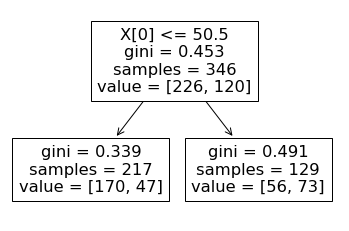

In [12]:
tree.plot_tree(tree_model)

X[0] <= 50.5 refers to the criterion that the decision tree is using to decide whether the data belong in the category on the left (0) or the right (1)

gini is the method if finding the above criterion, which is referred to a gini impurity. There are some other metrics, which you can see here: https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134

samples = number of samples in that group
value = left value is 0 and right value is 1

So, based on the bottom values, what does 56 mean? - should be the false positives!


In [13]:
tn, fp, fn, tp = metrics.confusion_matrix(ytrain,tree_model.predict(Xtrain)).ravel()
print(tn, fp, fn, tp)

170 56 47 73


But of course, the tree that we are seeing is from the training set, so just keep that in mind when trying to interpret this visualization

Let's try building a model without specifing the number of branches

In [14]:
full_tree_model = tree.DecisionTreeClassifier()
full_tree_model = full_tree_model.fit(Xtrain, ytrain)
print(full_tree_model.score(Xtrain, ytrain))
print(full_tree_model.score(Xtest, ytest))

0.7456647398843931
0.646551724137931


Hmm, the accuracy of the testing set didn't actually improve, though the accuracy of the training set did. We are probably overfitting

[Text(574.679347826087, 1045.3846153846155, 'X[0] <= 50.5\ngini = 0.453\nsamples = 346\nvalue = [226, 120]'),
 Text(175.8913043478261, 961.7538461538462, 'X[0] <= 24.5\ngini = 0.339\nsamples = 217\nvalue = [170, 47]'),
 Text(48.52173913043478, 878.123076923077, 'X[0] <= 19.5\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(24.26086956521739, 794.4923076923078, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(72.78260869565217, 794.4923076923078, 'X[0] <= 20.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(48.52173913043478, 710.8615384615384, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(97.04347826086956, 710.8615384615384, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(303.2608695652174, 878.123076923077, 'X[0] <= 31.5\ngini = 0.401\nsamples = 166\nvalue = [120, 46]'),
 Text(194.08695652173913, 794.4923076923078, 'X[0] <= 28.5\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(145.56521739130434, 710.8615384615384, 'X[0] <= 25.5\ngini = 0.415\nsamples = 17\

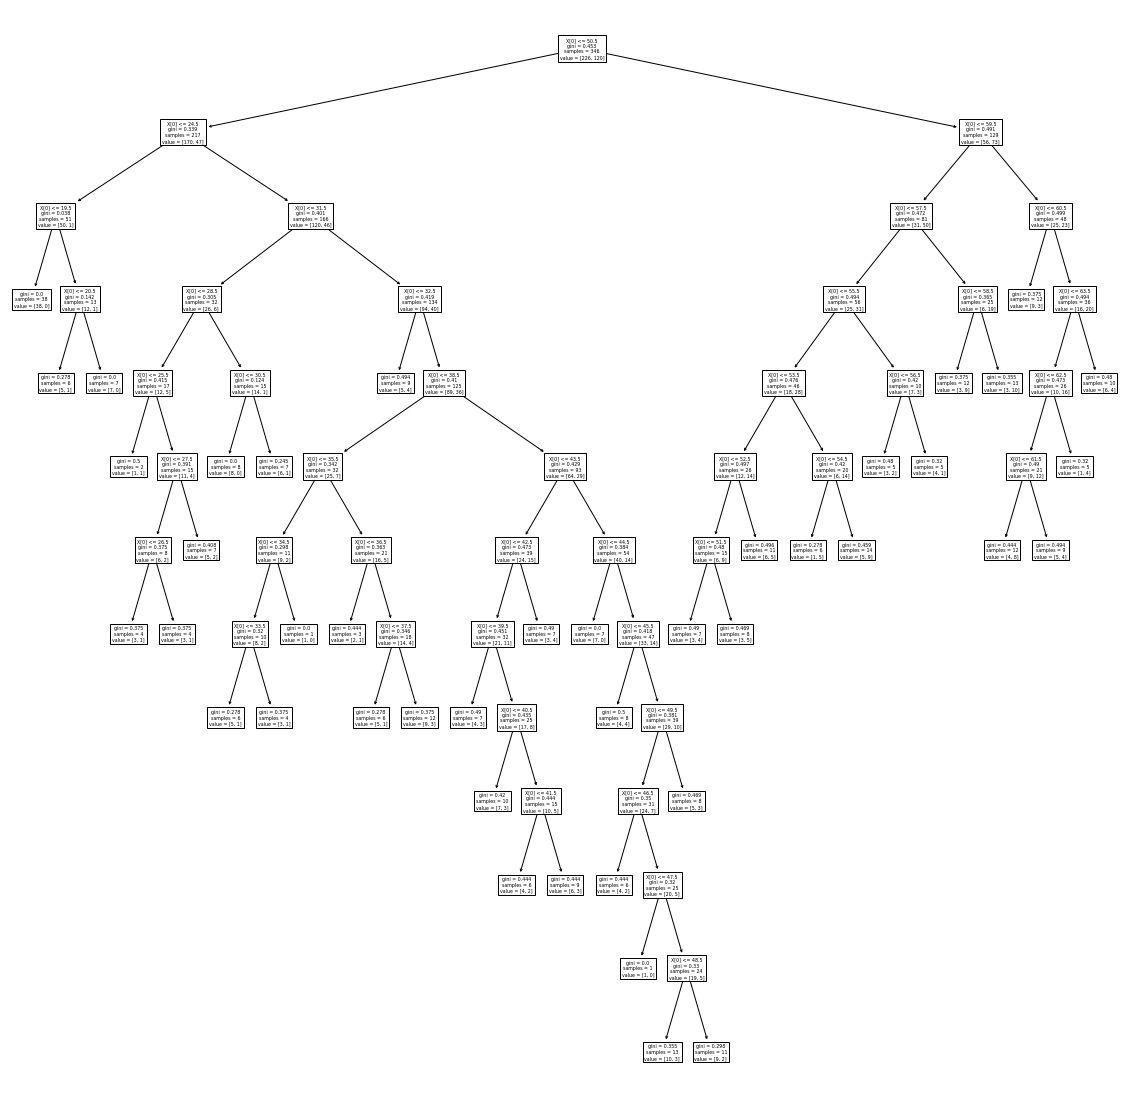

In [15]:
plt.figure(figsize=[20,20])
tree.plot_tree(full_tree_model)

Oh yeah. look at that tree. Its huge! We are probably overfitting quite a bit and we obviously lose the ability to intepret the model.



One thing you can do to improve your decision tree without necessarily running into this problem of overfitting is to run multiple decision trees and basically combining the different trees. This is called a random forest https://en.wikipedia.org/wiki/Random_forest which will be discussed more in CSS100

Now, let's look at a logistic regression

https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7

Instead of a straight line, you get an S-shape sigmoid that corresponds to the probability of the X data being in group 1

If the linear model is y = mx+b

Then the logistic regression model is y = 1/(1+e^-(mx+b))

And just like with linear regression and with the decision tree, we first create an instance of the model, then we fit the data

In [16]:
logit_model = LogisticRegression(fit_intercept=True,random_state =1)
logit_model = logit_model.fit(Xtrain, ytrain)

We can check the possible classes and also the coefficient and intercept values

In [17]:
logit_model.classes_

array([0, 1])

In [18]:
logit_model.coef_

array([[0.06469053]])

In [19]:
logit_model.intercept_

array([-3.55527328])

And just like before, we can check the accuracy

In [20]:
print(logit_model.score(Xtrain, ytrain)) 
print(logit_model.score(Xtest, ytest))

0.684971098265896
0.6637931034482759


And just like with the decision tree, the predictions are 1's or 0's

These values are based on the probability of y. Anything above .5 is considered to be in group 1, otherwise, group 0

In [21]:
logit_model.predict(Xtest)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1])

We can also check the probability of those predictions below


In [22]:
logit_model.predict_proba(Xtest)

array([[0.92096522, 0.07903478],
       [0.85919609, 0.14080391],
       [0.59518384, 0.40481616],
       [0.83404316, 0.16595684],
       [0.38804449, 0.61195551],
       [0.88108033, 0.11891967],
       [0.69810095, 0.30189905],
       [0.48315728, 0.51684272],
       [0.85919609, 0.14080391],
       [0.41917561, 0.58082439],
       [0.45096376, 0.54903624],
       [0.87413336, 0.12586664],
       [0.88108033, 0.11891967],
       [0.37279843, 0.62720157],
       [0.80541456, 0.19458544],
       [0.59518384, 0.40481616],
       [0.73736981, 0.26263019],
       [0.49932353, 0.50067647],
       [0.80541456, 0.19458544],
       [0.68429492, 0.31570508],
       [0.8248945 , 0.1751055 ],
       [0.8248945 , 0.1751055 ],
       [0.62593533, 0.37406467],
       [0.85919609, 0.14080391],
       [0.92096522, 0.07903478],
       [0.35780114, 0.64219886],
       [0.85919609, 0.14080391],
       [0.6409544 , 0.3590456 ],
       [0.35780114, 0.64219886],
       [0.38804449, 0.61195551],
       [0.

Each row should sum to 1, which corresponds to the probability of that data being in group 0 (column 0) or group 1 (column 1)


Let's visualize this logistic regression

We can plot
1. scatter plot of data
2. the predicted probability of which class the data will belong too - in blue
3. the predicted classes - in red
4. and .50 in orange, which is basically the criterion

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

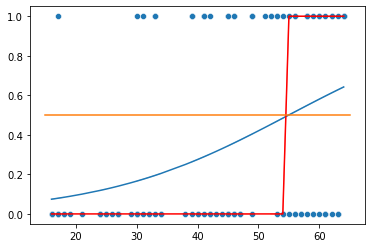

In [23]:
sns.scatterplot(Xtest[:,0],ytest)
sns.lineplot(Xtest[:,0],logit_model.predict_proba(Xtest)[:,1])
sns.lineplot(Xtest[:,0],logit_model.predict(Xtest)==1,color='r') 
sns.lineplot([15,65],[.5,.5])

Logistic regressions are handy because they are probabilistic, but they have similar assumptions to linear regressions (e.g., independence of features, no multicollinearity, assumes linearity of independent variables and log odds)

There are a lot of different classifiers

One type is a naive Bayes. This utilizes Bayes theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. https://en.wikipedia.org/wiki/Bayes%27_theorem

All naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features

Bayes theory: 

Posterior = Likelihood * Prior / Evidence
We can make this clear with a smoke and fire case.

What is the probability that there is fire given that there is smoke?

Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)

To run bayes theory, we do the same thing we did before. define the model and fit it to our training data

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

GaussianNB()

And let's check the score of this fit

In [25]:
print(gnb.score(Xtrain, ytrain))
print(gnb.score(Xtest,ytest))

0.7023121387283237
0.6810344827586207


Pretty good! Just note that naive bayes can tend to overfit and it assumes independence of the features (which may not necessarily be the case)

Another classification technique is a k-nearest neighbors, which predicts which class a new test data point belongs to by identifying its k nearest neighbors’ class. We select these k nearest neighbors based on Euclidean distance

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [27]:
print(knn.score(Xtrain, ytrain))
print(knn.score(Xtest,ytest))

0.7369942196531792
0.6379310344827587


Wow! That worked pretty well!

One of the limitations of k-nn is that you need to be mindful of specifing the number of neighbors to consider. Here, the default was 5, which may be a lot for small datasets, but not enough for larger datasets

We can compare the fits by looking at the scores for the training and testing set. Note that it helps to check the training and testing to see which models may be overfitting. But in the end, we are mostly concerned with the testing score

In [28]:
print('tree train and test')
print(tree_model.score(Xtrain,ytrain),tree_model.score(Xtest,ytest))
print('------------------')
print('full tree train and test')
print(full_tree_model.score(Xtrain,ytrain),full_tree_model.score(Xtest,ytest))
print('------------------')

print('logistic regression')
print( logit_model.score(Xtrain,ytrain), logit_model.score(Xtest,ytest))
print('------------------')

print('naive bayes')
print(gnb.score(Xtrain,ytrain), gnb.score(Xtest,ytest))
print('------------------')

print('k nearest neighbor')
print(knn.score(Xtrain,ytrain),knn.score(Xtest,ytest))

tree train and test
0.7023121387283237 0.6810344827586207
------------------
full tree train and test
0.7456647398843931 0.646551724137931
------------------
logistic regression
0.684971098265896 0.6637931034482759
------------------
naive bayes
0.7023121387283237 0.6810344827586207
------------------
k nearest neighbor
0.7369942196531792 0.6379310344827587


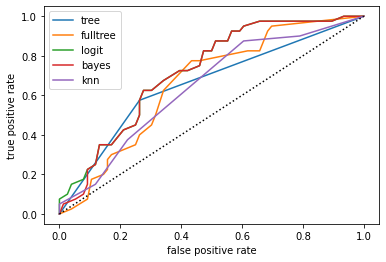

In [29]:
fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(ytest,tree_model.predict_proba(Xtest)[:,1])
fpr_fulltree,tpr_fulltree,thresholds_fulltree = metrics.roc_curve(ytest,full_tree_model.predict_proba(Xtest)[:,1])
fpr_logit,tpr_logit,thresholds_logit = metrics.roc_curve(ytest,logit_model.predict_proba(Xtest)[:,1])
fpr_gnb,tpr_gnb,thresholds_gnb = metrics.roc_curve(ytest,gnb.predict_proba(Xtest)[:,1])
fpr_knn,tpr_knn,thresholds_knn = metrics.roc_curve(ytest,knn.predict_proba(Xtest)[:,1])

plt.plot(fpr_tree,tpr_tree,label='tree')
plt.plot(fpr_fulltree,tpr_fulltree,label='fulltree')
plt.plot(fpr_logit,tpr_logit,label='logit')
plt.plot(fpr_gnb,tpr_gnb,label='bayes')
plt.plot(fpr_knn,tpr_knn,label='knn')

plt.plot([0,1],[0,1],color=[0,0,0],linestyle=':')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

Different types of data, numbers of features, amounts of data, etc etc will all influence the performance of different models.

Here are some helpful resources describing more about these, and other algorithms

https://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/

https://www.geeksforgeeks.org/advantages-and-disadvantages-of-different-classification-models/

In [30]:
from sklearn.svm import SVC

Here, we will create an instance of the model with a linear kernal, meaning it will separate the data using just a line

In [31]:
svc_model = SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

SVC(kernel='linear')

Let's check the accuracy of this SVC model.

In [32]:
print(svc_model.score(Xtrain,ytrain))
print(svc_model.score(Xtest,ytest))

0.653179190751445
0.6551724137931034


Pretty good!

We can check the predictions. Again, it returns a 1 or 0 on whether it thinks the data will belong to group 1 or 0

In [33]:
svc_model.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

We can view our support vectors, which are the datapoints on the margin

In [34]:
svc_model.support_vectors_

array([[52.],
       [42.],
       [61.],
       [49.],
       [62.],
       [58.],
       [44.],
       [43.],
       [56.],
       [61.],
       [48.],
       [55.],
       [53.],
       [50.],
       [61.],
       [60.],
       [60.],
       [53.],
       [58.],
       [49.],
       [43.],
       [41.],
       [45.],
       [62.],
       [53.],
       [48.],
       [49.],
       [48.],
       [49.],
       [60.],
       [59.],
       [64.],
       [55.],
       [41.],
       [21.],
       [55.],
       [37.],
       [60.],
       [45.],
       [49.],
       [42.],
       [53.],
       [50.],
       [50.],
       [48.],
       [63.],
       [40.],
       [59.],
       [42.],
       [48.],
       [49.],
       [60.],
       [56.],
       [59.],
       [48.],
       [52.],
       [55.],
       [48.],
       [57.],
       [60.],
       [44.],
       [64.],
       [50.],
       [40.],
       [40.],
       [44.],
       [60.],
       [48.],
       [45.],
       [62.],
       [49.],
      

And plot them onto our data. This gives us a quick look into how ou data was separate

In [35]:
Xtrain

array([[39],
       [52],
       [53],
       [42],
       [40],
       [61],
       [61],
       [49],
       [17],
       [49],
       [59],
       [16],
       [34],
       [32],
       [62],
       [33],
       [58],
       [15],
       [44],
       [43],
       [58],
       [36],
       [56],
       [36],
       [51],
       [18],
       [61],
       [31],
       [48],
       [52],
       [38],
       [55],
       [55],
       [43],
       [61],
       [55],
       [58],
       [20],
       [32],
       [16],
       [64],
       [53],
       [50],
       [26],
       [59],
       [58],
       [61],
       [60],
       [17],
       [61],
       [60],
       [46],
       [33],
       [53],
       [59],
       [60],
       [58],
       [32],
       [49],
       [55],
       [43],
       [16],
       [41],
       [58],
       [45],
       [62],
       [38],
       [53],
       [48],
       [63],
       [56],
       [20],
       [54],
       [49],
       [37],
       [53],
       [48],

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

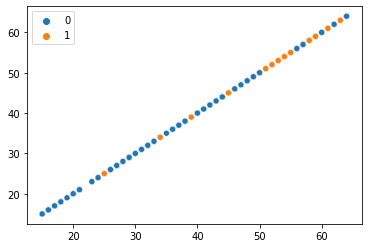

In [36]:
sns.scatterplot(Xtrain[:,0], Xtrain[:,0], hue=ytrain)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')

Alterantively, we can plot our margin using the coef_ and intercept_ of the model.

Note: this is specific to linear SVC

In [37]:
svc_model.coef_

array([[0.]])

In [38]:
svc_model.intercept_

array([-1.])

To use the coef_ and intercept, we need to do a few things. First, let's pull out the coefficents, which are basically weights

In [39]:
w = svc_model.coef_[0]
print(w)

[0.]


Dividing them basically gets us a slope

In [40]:
slope = -w[0] / w[1] 
print(slope)

IndexError: index 1 is out of bounds for axis 0 with size 1

Our intercept needs to be adjusted by the weight of the y-axis

In [41]:
intercept = -svc_model.intercept_[0]/w[1]
print(intercept)

IndexError: index 1 is out of bounds for axis 0 with size 1

Then, using Xtrain as the X in our y = m*x + b equation, we can derive our line

In [42]:
yy = slope * Xtrain['displacement'] + intercept

NameError: name 'slope' is not defined

Let's put this all on the plot

In [43]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'], hue=ytrain)
plt.plot(Xtrain['displacement'], yy)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')
plt.ylim([0,50])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Looks good!

We can do this with the testing data too to get a feel for how well it separated it

In [44]:
yy = slope * Xtest['displacement'] + intercept

sns.scatterplot(Xtest['displacement'], Xtest['mpg'], hue=ytest)
plt.plot(Xtest['displacement'], yy)
plt.ylim([0,50])

NameError: name 'slope' is not defined

Here is another method to generate the margin. Its a bit more complex

In [45]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'],hue=ytrain)

# create grid to evaluate model
xx = np.linspace(0, 500, 30)  # works best if you know the xlim[0] and xlim[1]
yy = np.linspace(0,60, 30)  # works best if you know the ylim[0] and ylim[1]
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

That's pretty much most of what I wanted to cover of binary classification

There are other types of classification techniques (Random forest, perceptron, k-nearest neighbors) and we could certainly spend a lot more time talking about the naunces of Decision Trees and Support Vector machines.

For now, I think this should give you a basic idea of how to conduct classification, what is happening, and how to evaluate the classification

Next, we will cover what cross-validation is because it concerns how we conduct our machine learning